In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [7]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup

# URL of the category page (Rice & Atta as an example)
url = "https://www.bigbasket.com/pc/staples/rice-rice-products/"

# Send a request to the website
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
    soup = BeautifulSoup(response.text, "html.parser")
else:
    print("Failed to retrieve the page. Status code:", response.status_code)


Successfully fetched the webpage!


In [41]:
# Find all product containers
products = soup.find_all("li", class_="PaginateItems___StyledLi-sc-1yrbjdr-0 dDBqny")  # Change this if needed

# Extract product names and prices
for product in products:
    name_tag = product.find("h3", class_="block m-0 line-clamp-2 font-regular text-base leading-sm text-darkOnyx-800 pt-0.5 h-full")
    price_tag = product.find("span", class_="Label-sc-15v1nk5-0 Pricing___StyledLabel-sc-pldi2d-1 gJxZPQ AypOi")  # Adjust this if needed

    if name_tag and price_tag:  # Ensure both exist before extracting
        name = name_tag.text.strip()
        price = price_tag.text.strip()
        print(f"{name} - {price}")


Sona Masoori Raw Rice/Akki - ₹1532
Rice/Akki - Jeera/Jeeraga Samba - ₹539
Idli/Idly Rice - ₹544
Rice/Akki - Jeera/Jeeraga Samba - ₹537.5
Basmati Rice/Basmati Akki - Traditional - ₹1029
HMT Kolam Raw Rice/Akki - ₹207
Poha/Avalakki/Aval/Chivda - Thin White Poha - ₹93.06
Salted Murmure - ₹34
Miniket Rice - ₹315
Rozana Basmati Rice - Non-GMO, Vegan, Non-Sticky, Fluffy Grains, Gluten Free - ₹90.3
Kichili Samba Rice - ₹120
Charminar Basmati Rice/Basmati Akki - Select - ₹122
Organic Red Rice/Lal Chawal/Akki - ₹188
Premium Basmati Rice/Basmati Akki - ₹638.92
Premium Basmati Rice - Long Grain - ₹399
Biryani Basmati Rice 1kg + Date crown Fard Premium Dates 250g Pouch Combo Pack - ₹218.5
Natives Basmati Rice/Basmati Akki - ₹169.2
Organic Poha/Avalakki - ₹103
Broken Rice - ₹50
Chia Seed Whole - Superfood, Rich In Omega-3 Fatty Acids, Antioxidants - ₹267
Potato Flakes - ₹350
Makka Poha - Packed With Nutrients, Healthy, Tasty - ₹29.35
Ala Carte Special Rice - Long & Fluffy, Slender & Non-Sticky - ₹7

In [42]:
import csv
import requests
from bs4 import BeautifulSoup

url = "https://www.bigbasket.com/pc/staples/rice-rice-products/"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("li", class_="PaginateItems___StyledLi-sc-1yrbjdr-0 dDBqny")  

    
    product_data = []

    # Loop through each product and extract details
    for product in products:
        name_tag = product.find("h3", class_="block m-0 line-clamp-2 font-regular text-base leading-sm text-darkOnyx-800 pt-0.5 h-full")
        price_tag = product.find("span", class_="Label-sc-15v1nk5-0 Pricing___StyledLabel-sc-pldi2d-1 gJxZPQ AypOi")  

        if name_tag and price_tag:
            name = name_tag.text.strip()
            price = price_tag.text.strip()

            # Add data to the list
            product_data.append([name, price])

    with open("bigbasket_products.csv", "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Product Name", "Price"]) 
        writer.writerows(product_data)  

    print("✅ Data saved to bigbasket_products.csv successfully!")

else:
    print("❌ Failed to fetch the webpage. Status code:", response.status_code)

✅ Data saved to bigbasket_products.csv successfully!


In [43]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("bigbasket_products.csv")

# Display the first few rows
print(df.head())


                              Product Name   Price
0               Sona Masoori Raw Rice/Akki   ₹1532
1          Rice/Akki - Jeera/Jeeraga Samba    ₹539
2                           Idli/Idly Rice    ₹544
3          Rice/Akki - Jeera/Jeeraga Samba  ₹537.5
4  Basmati Rice/Basmati Akki - Traditional   ₹1029


In [44]:
print("Most Expensive Product:")
print(df.loc[df["Price"].idxmax()])

print("\nCheapest Product:")
print(df.loc[df["Price"].idxmin()])


Most Expensive Product:
Product Name    Champion Choice Exotic Basmati Rice - For Biry...
Price                                                     ₹992.25
Name: 42, dtype: object

Cheapest Product:
Product Name    Basmati Rice/Basmati Akki - Traditional
Price                                             ₹1029
Name: 4, dtype: object


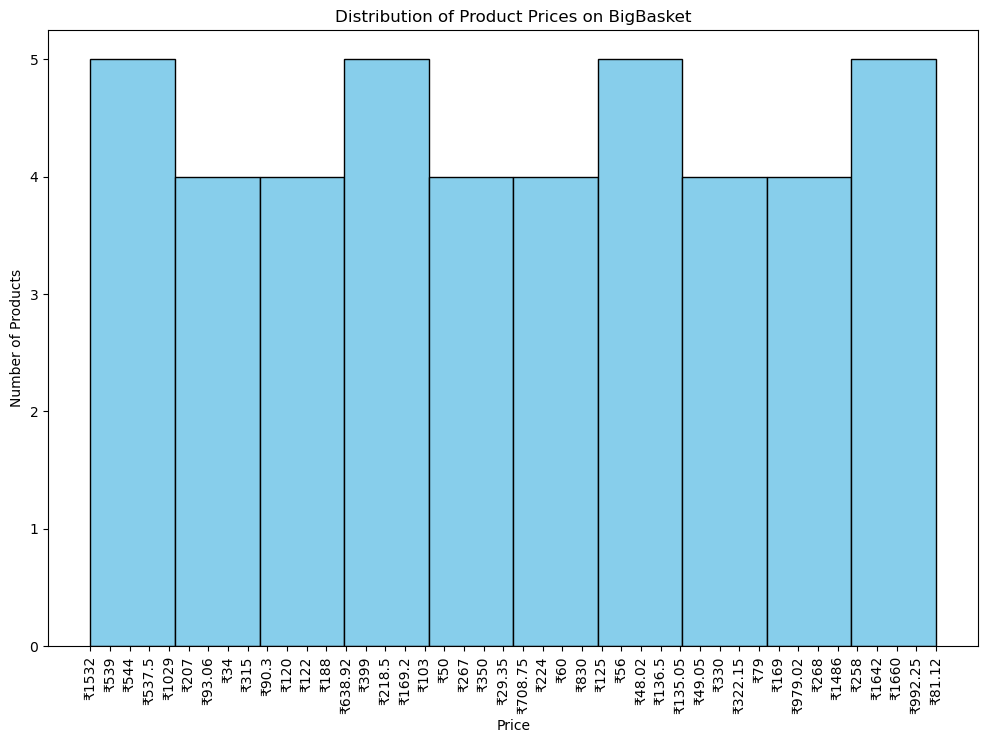

In [45]:
import matplotlib.pyplot as plt

# Plot histogram of prices
plt.figure(figsize=(12,8))
plt.hist(df["Price"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices on BigBasket")
plt.xticks(rotation=90) 
plt.show()


In [51]:
if "Price" in df.columns and not df["Price"].empty:
    price_min, price_max = df["Price"].min(), df["Price"].max()

In [55]:
df["Price"] = df["Price"].fillna(df["Price"].median())


In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert product names to numbers
df["Product Name Encoded"] = encoder.fit_transform(df["Product Name"])

# Define features and target variable
X = df[["Product Name Encoded"]]  # Feature
y = df["Price"]  # Target variable



In [56]:
# Create a dictionary to map product names to numeric values
product_mapping = {name: idx for idx, name in enumerate(df["Product Name"].unique())}

# Convert product names into numbers using the mapping
df["Product Name Encoded"] = df["Product Name"].map(product_mapping)

# Features and target
X = df[["Product Name Encoded"]]
y = df["Price"]


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:
new_product = "Parmal Rice"

# Check if the product exists in the mapping
if new_product in product_mapping:
    new_product_encoded = product_mapping[new_product]
    predicted_price = model.predict([[new_product_encoded]])
    print(f"Predicted Price for {new_product}: ₹{predicted_price[0]:.2f}")
else:
    print(f"Product '{new_product}' is not in the dataset. Unable to predict.")


Predicted Price for Parmal Rice: ₹440.58


/home/prixoplusplus/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
